In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression, make_blobs, make_friedman1
from sklearn.datasets import make_classification, load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

np.set_printoptions(precision=2)

# Modelos para regressão linear

## Regressão Linear

In [3]:
from sklearn.linear_model import LinearRegression

X_R1, y_R1 = make_regression(n_samples=100, n_features=1,
                             n_informative=1, bias=150.0,
                             noise=30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

print(f'Coeficiente do modelo linear (w): {lin_reg.coef_}')
print(f'Intercepto do modelo linear (b): {lin_reg.intercept_:.3f}')
print(f'Pontuação R^2 (treinamento): {lin_reg.score(X_train, y_train):.3f}')
print(f'Pontuação R^2 (teste): {lin_reg.score(X_test, y_test):.3f}')

Coeficiente do modelo linear (w): [45.71]
Intercepto do modelo linear (b): 148.446
Pontuação R^2 (treinamento): 0.679
Pontuação R^2 (teste): 0.492


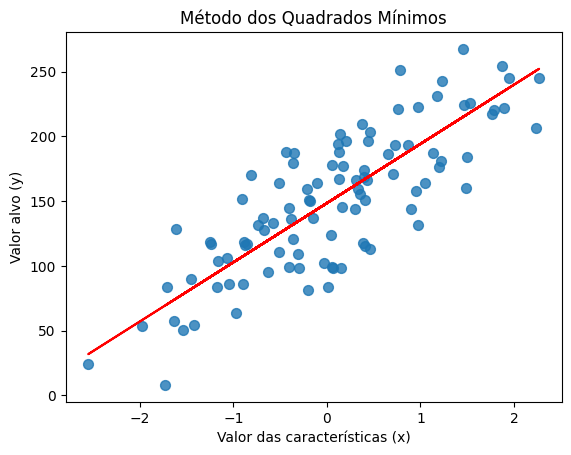

In [4]:
plt.figure()
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, lin_reg.coef_ * X_R1 + lin_reg.intercept_, 'r-')
plt.title('Método dos Quadrados Mínimos')
plt.xlabel('Valor das características (x)')
plt.ylabel('Valor alvo (y)')
plt.show()

In [5]:
X_crime, y_crime = load_crime_dataset()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

print('Conjunto de dados de crimes.')
print(f'Intercepto do modelo linear: {lin_reg.intercept_}')
print(f'Coeficiente do modelo linear:\n {lin_reg.coef_}')
print(f'Pontuação do R^2 (treinamento): {lin_reg.score(X_train, y_train):.3f}')
print(f'Pontuação do R^2 (teste): {lin_reg.score(X_test, y_test):.3f}')

Conjunto de dados de crimes.
Intercepto do modelo linear: -1728.1306726033304
Coeficiente do modelo linear:
 [ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+0

## Regressão Ridge

In [6]:
from sklearn.linear_model import Ridge

lin_ridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Conjunto de dados de crimes.')
print(f'Intercepto do modelo linear Ridge: {lin_ridge.intercept_:.3f}')
print(f'Coeficiente do modelo linear Ridge:\n {lin_ridge.coef_}')
print(f'Pontuação do R^2 (treinamento): {lin_ridge.score(X_train, y_train):.3f}')
print(f'Pontuação do R^2 (teste): {lin_ridge.score(X_test, y_test):.3f}')
print(f'Número de características não nulas: {np.sum(lin_ridge.coef_ != 0)}')

Conjunto de dados de crimes.
Intercepto do modelo linear Ridge: -3352.423
Coeficiente do modelo linear Ridge:
 [ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00 -1.97e+01 -2.81e-03
  1.66e+00 -6.61e-03 -6.95e+00  1.72e+01 -5.63e+00  8.84e+00  6.79e-01
 -7.34e+00  6.70e-03  9.79e-04  5.01e-03 -4.90e+00 -1.79e+01  9.18e+00
 -1.24e+00  1.22e+00  1.03e+01 -3.78e+00 -3.73e+00  4.75e+00  8.43e+00
  3.09e+01  1.19e+01 -2.05e+00 -3.82e+01  1.85e+01  1.53e+00 -2.20e+01
  2.46e+00  3.29e-01  4.02e+00 -1.13e+01 -4.70e-03  4.27e+01 -1.23e-03
  1.41e+00  9.35e-01 -3.00e+00  1.12e+00 -1.82e+01 -1.55e+01  2.42e+01
 -1.32e+01 -4.20e-01 -3.60e+01  1.30e+01 -2.81e+01  4.39e+01  3.87e+01
 -6.46e+01 -1.64e+01  2.90e+01  4.15e+00  5.34e+01  1.99e-02 -5.47e-01
  1.24e+01  1.04e+01 -1.57e+00  3.16e+00  8.78e+00 -2.95e+01 -2.34e-04
  3.14e-04 -4.13e-04 -1.80e-04 -5.74e-01 -5.18e-01 -4.21e-01  1.53e-01
  1.33e+00  3.85e+00  3.03e+00 -3.78e+01  1.38e-01  3.08e-01  1.57e+01
  3.31e-01  3.36e+00  1.61e-01 -2.68e

## Regressão Ridge com características (features) normalizadas

In [7]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_ridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Conjunto de dados de crimes.')
print(f'Intercepto do modelo linear Ridge: {lin_ridge.intercept_}')
print(f'Coeficiente do modelo linear Ridge:\n {lin_ridge.coef_}')
print(f'Pontuação do R^2 (treinamento): {lin_ridge.score(X_train_scaled, y_train):.3f}')
print(f'Pontuação do R^2 (teste): {lin_ridge.score(X_test_scaled, y_test):.3f}')
print(f'Número de características não nulas: {np.sum(lin_ridge.coef_ != 0)}')

Conjunto de dados de crimes.
Intercepto do modelo linear Ridge: 933.390638504416
Coeficiente do modelo linear Ridge:
 [  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
Pontuação do R^2 (treinamento): 0.615
Pontuação do R^2 (teste): 0.599
Número de características não nulas: 88


## Regressão Ridge com regularização do parâmetro $\alpha$.

In [8]:
print('Regressão Ridge: Efeito da regularização do parâmetro alpha\n')

lista = [0, 1, 10, 20, 50, 100, 1000]

for this_alpha in lista:
    lin_ridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = lin_ridge.score(X_train_scaled, y_train)
    r2_test = lin_ridge.score(X_test_scaled, y_test)
    big_coef = np.sum(abs(lin_ridge.coef_) > 1.0)
    print(f'Alpha = {this_alpha:.2f}\n abs(coeff) > 1.0: {big_coef:.2f},\
 R^2 (treinamento): {r2_train:.2f}, R^2 (teste): {r2_test:.2f}')

Regressão Ridge: Efeito da regularização do parâmetro alpha

Alpha = 0.00
 abs(coeff) > 1.0: 88.00, R^2 (treinamento): 0.67, R^2 (teste): 0.50
Alpha = 1.00
 abs(coeff) > 1.0: 87.00, R^2 (treinamento): 0.66, R^2 (teste): 0.56
Alpha = 10.00
 abs(coeff) > 1.0: 87.00, R^2 (treinamento): 0.63, R^2 (teste): 0.59
Alpha = 20.00
 abs(coeff) > 1.0: 88.00, R^2 (treinamento): 0.61, R^2 (teste): 0.60
Alpha = 50.00
 abs(coeff) > 1.0: 86.00, R^2 (treinamento): 0.58, R^2 (teste): 0.58
Alpha = 100.00
 abs(coeff) > 1.0: 87.00, R^2 (treinamento): 0.55, R^2 (teste): 0.55
Alpha = 1000.00
 abs(coeff) > 1.0: 84.00, R^2 (treinamento): 0.31, R^2 (teste): 0.30


# Regressão Lasso

In [9]:
from sklearn.linear_model import Lasso

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_lasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled, y_train)

print('Conjunto de dados de crime:')
print(f'Intercepto do modelo de regressão linear Lasso: {lin_lasso.intercept_:.3f}')
print(f'Coeficiente do modelo de regressão linear Lasso: \n {lin_lasso.coef_}')
print(f'Características não-nulas: {np.sum(lin_lasso.coef_ != 0)}')

print(f'Pontuação do R^2 (treinamento): {lin_lasso.score(X_train_scaled, y_train):.3f}')
print(f'Pontuação do R^2 (teste): {lin_lasso.score(X_test_scaled, y_test):.3f}')
print('Características com pesos não-nulos (ordenado por magnitude absoluta): ')

new_list = list(zip(list(X_crime), lin_lasso.coef_))

for e in sorted(new_list, key=lambda e:-abs(e[1])):
    if e[1] != 0:
        print(f'\t {e[0]}, {e[1]:.3f}')


Conjunto de dados de crime:
Intercepto do modelo de regressão linear Lasso: 1186.612
Coeficiente do modelo de regressão linear Lasso: 
 [    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Características não-nulas: 20
Pontuação do R^2 (treinamento): 0.631
Pontuaçã

In [10]:
print('Regressão Lasso: Efeito da regularização alfa\n Número de parâmetros mantido no modelo final\n')

alpha_list = [0.5, 1, 2, 3, 5, 10, 20, 50]

for alpha in alpha_list:
    lin_lasso = Lasso(alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = lin_lasso.score(X_train_scaled, y_train)
    r2_test = lin_lasso.score(X_test_scaled, y_test)
    
    print(f'Alfa: {alpha}\n Característica mantida: {np.sum(lin_lasso.coef_ != 0)}, \
        R^2 (treinamento): {r2_train:.2f}, R^2 (Teste): {r2_test:.2f}\n')

Regressão Lasso: Efeito da regularização alfa
 Número de parâmetros mantido no modelo final

Alfa: 0.5
 Característica mantida: 35,         R^2 (treinamento): 0.65, R^2 (Teste): 0.58

Alfa: 1
 Característica mantida: 25,         R^2 (treinamento): 0.64, R^2 (Teste): 0.60

Alfa: 2
 Característica mantida: 20,         R^2 (treinamento): 0.63, R^2 (Teste): 0.62

Alfa: 3
 Característica mantida: 17,         R^2 (treinamento): 0.62, R^2 (Teste): 0.63

Alfa: 5
 Característica mantida: 12,         R^2 (treinamento): 0.60, R^2 (Teste): 0.61

Alfa: 10
 Característica mantida: 6,         R^2 (treinamento): 0.57, R^2 (Teste): 0.58

Alfa: 20
 Característica mantida: 2,         R^2 (treinamento): 0.51, R^2 (Teste): 0.50

Alfa: 50
 Característica mantida: 1,         R^2 (treinamento): 0.31, R^2 (Teste): 0.30



# Regressão Polinomial

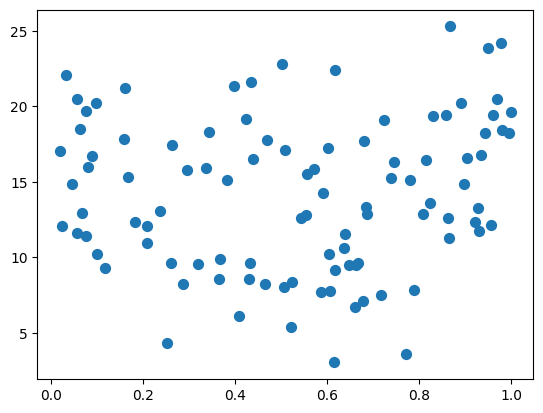

In [11]:
X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50)
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

print(f'Coeficiente do modelo linear (w): {lin_reg.coef_}')
print(f'Intercepto do modelo linear (b): {lin_reg.intercept_:.3f}')
print(f'R^2 (treinamento): {lin_reg.score(X_train, y_train):.3f}')
print(f'R^2 (teste) {lin_reg.score(X_test, y_test):.3f}')

Coeficiente do modelo linear (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
Intercepto do modelo linear (b): 1.543
R^2 (treinamento): 0.722
R^2 (teste) 0.722


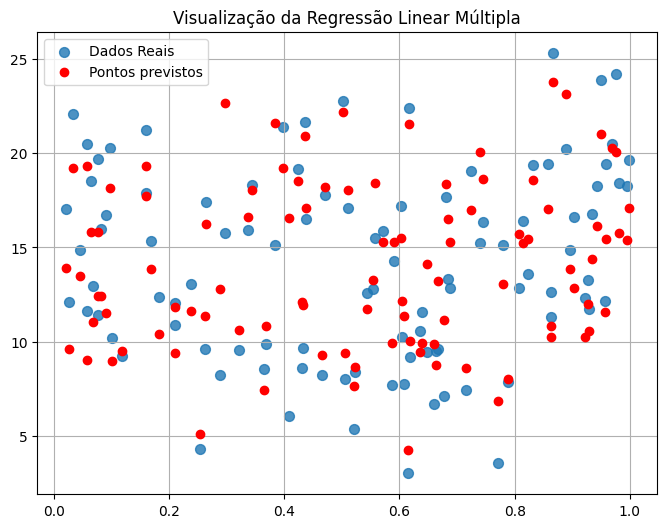

In [13]:
y_pred = lin_reg.predict(X_F1)
sorted_zip = sorted(zip(X_F1[:, 2], y_pred))
x_plot, y_plot = zip(*sorted_zip)

plt.figure(figsize=(8, 6))
plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50, alpha=0.8, label='Dados Reais')
plt.plot(x_plot, y_plot, 'ro', label='Pontos previstos')

plt.title('Visualização da Regressão Linear Múltipla')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
np.zeros((4,100)).reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [43]:
np.linspace(0, 10, 100).reshape(-1, 1).shape

(100, 1)

In [15]:
# Agora, transformamos os dados de entrada originais para adicionar características
# polinomiais de grau 2 (quadrático).

poly = PolynomialFeatures(degree=2)

X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

print(f'(Poli. grau 2), coeficiente do modelo linear (w): \n{lin_reg.coef_}')
print(f'(Poli. grau 2), intercepto do modelo linear (b): {lin_reg.intercept_:.3f}')
print(f'(Poli. grau 2), R^2 (treinamento): {lin_reg.score(X_train, y_train):.3f}')
print(f'(Poli. grau 2), R^2 (teste): {lin_reg.score(X_test, y_test):.3f}')

(Poli. grau 2), coeficiente do modelo linear (w): 
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]
(Poli. grau 2), intercepto do modelo linear (b): -3.206
(Poli. grau 2), R^2 (treinamento): 0.969
(Poli. grau 2), R^2 (teste): 0.805


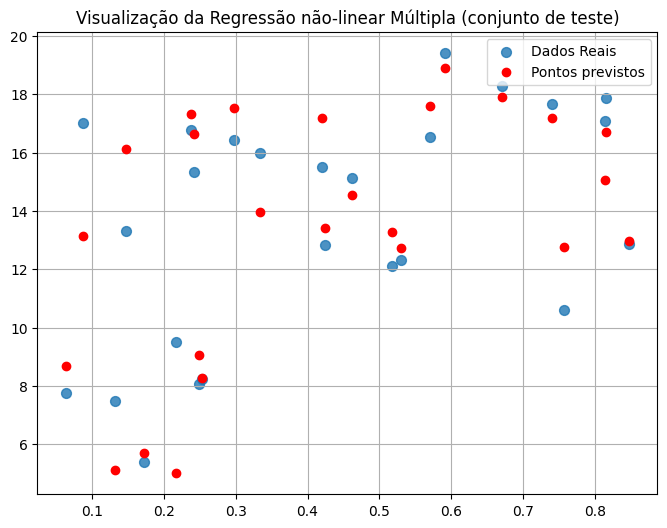

In [16]:
y_pred = lin_reg.predict(X_test)
sorted_zip = sorted(zip(X_test[:, 2], y_pred))
x_plot, y_plot = zip(*sorted_zip)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], y_test, marker='o', s=50, alpha=0.8, label='Dados Reais')
plt.plot(x_plot, y_plot, 'ro', label='Pontos previstos')

plt.title('Visualização da Regressão não-linear Múltipla (conjunto de teste)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Adicionar muitas características polinomiais regularmente lida com problema de
# sobreajuste, então, usualmente usamos características polinomiais combinadas
# com regressão, que tem uma penalidade de regularização, como regressão Ridge.

lin_ridge = Ridge().fit(X_train, y_train)

print(f'(Poli. grau 2 + Ridge), coeficiente do modelo linear (w): \n{lin_ridge.coef_}')
print(f'(Poli. grau 2 + Ridge), intercepto do modelo linear (b): {lin_ridge.intercept_:.3f}')
print(f'(Poli. grau 2 + Ridge), R^2 (treinamento): {lin_ridge.score(X_train, y_train):.3f}')
print(f'(Poli. grau 2 + Ridge), R^2 (teste): {lin_ridge.score(X_test, y_test):.3f}')

(Poli. grau 2 + Ridge), coeficiente do modelo linear (w): 
[ 0.    2.23  4.73 -3.15  3.86  1.61 -0.77 -0.15 -1.75  1.6   1.37  2.52
  2.72  0.49 -1.94 -1.63  1.51  0.89  0.26  2.05 -1.93  3.62 -0.72  0.63
 -3.16  1.29  3.55  1.73  0.94 -0.51  1.7  -1.98  1.81 -0.22  2.88 -0.89]
(Poli. grau 2 + Ridge), intercepto do modelo linear (b): 5.418
(Poli. grau 2 + Ridge), R^2 (treinamento): 0.826
(Poli. grau 2 + Ridge), R^2 (teste): 0.825


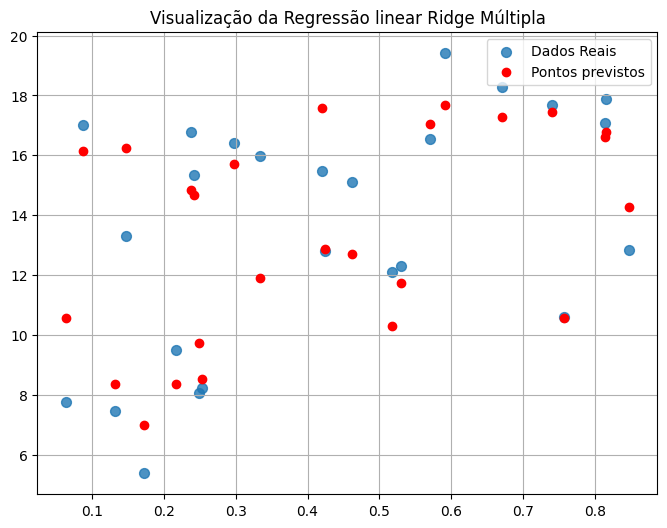

In [18]:
y_pred = lin_ridge.predict(X_test)
sorted_zip = sorted(zip(X_test[:, 2], y_pred))
x_plot, y_plot = zip(*sorted_zip)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], y_test, marker='o', s=50, alpha=0.8, label='Dados Reais')
plt.plot(x_plot, y_plot, 'ro', label='Pontos previstos')

plt.title('Visualização da Regressão linear Ridge Múltipla')
plt.legend()
plt.grid(True)
plt.show()

# Modelos lineares para classificação

## Regressão Logística

### Regressão logística para classificação binária.

In [19]:
fruits = pd.read_table('../Mod_1/Dfs/fruit_data_with_colors.txt')

feature_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names]
y_fruits = fruits['fruit_label']
target_names = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

Uma fruta com altura 6 e comprimento 8 é prevista para: ser uma maçã.
Uma fruta com altura 10 e comprimento 7 é prevista para: não ser uma maçã.
Acurácia do classificador logístico no conjunto de treinamento: 0.795
Acurácia do classificador logístico no conjunto de teste: 0.733


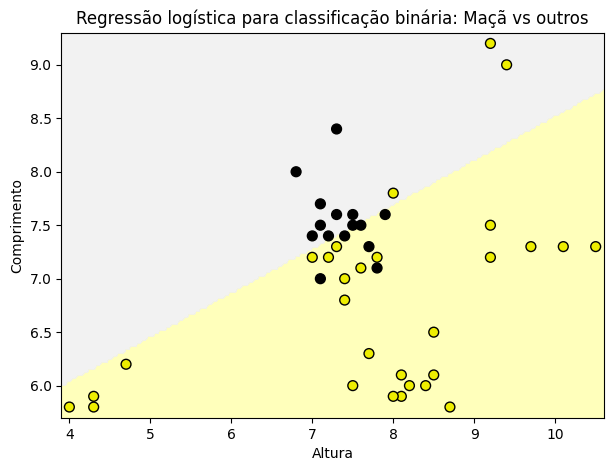

In [20]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)



fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

y_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.values,
                                                    y_apple.values, random_state=0)

log_reg = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(log_reg, X_train, y_train, None,
                    None, 'Regressão logística para classificação binária: Maçã vs outros', subaxes)

first_pred = ['não ser uma maçã', 'ser uma maçã'][int(log_reg.predict([[6, 8]])[0])]
second_pred = ['não ser uma maçã', 'ser uma maçã'][int(log_reg.predict([[10, 7]])[0])]

print(f'Uma fruta com altura 6 e comprimento 8 é prevista para: {first_pred}.')
print(f'Uma fruta com altura 10 e comprimento 7 é prevista para: {second_pred}.')

subaxes.set_xlabel('Altura')
subaxes.set_ylabel('Comprimento')

print(f'Acurácia do classificador logístico no conjunto de treinamento: {log_reg.score(X_train, y_train):.3f}')
print(f'Acurácia do classificador logístico no conjunto de teste: {log_reg.score(X_test, y_test):.3f}')



### Regressão logística em um conjunto de dados sintético simples

Acurácia do classificador logístico no conjunto de treinamento: 0.813
Acurácia do classificador logístico no conjunto de teste: 0.840


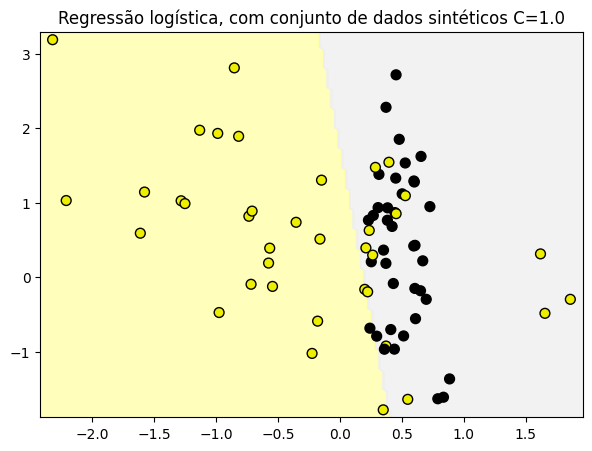

In [21]:
X_C2, y_C2 = make_classification(n_samples=100, n_features=2,
                                 n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y=0.1,
                                 class_sep=0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
log_reg = LogisticRegression().fit(X_train, y_train)
title = f'Regressão logística, com conjunto de dados sintéticos C={(1.0)}'
plot_class_regions_for_classifier_subplot(log_reg, X_train, y_train, None, None, title, subaxes)

print(f'Acurácia do classificador logístico no conjunto de treinamento: {log_reg.score(X_train, y_train):.3f}')
print(f'Acurácia do classificador logístico no conjunto de teste: {log_reg.score(X_test, y_test):.3f}')


### Regressão logística regularizada: Parâmetro C

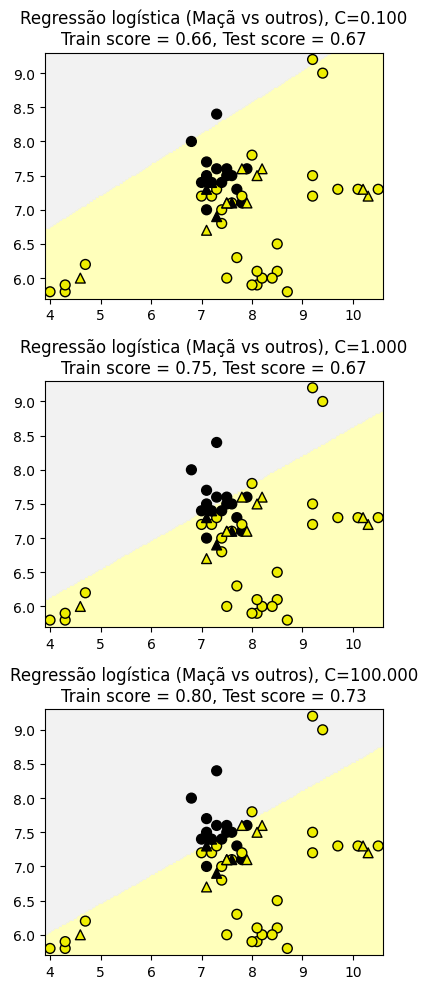

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.values,
                                                    y_apple.values, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    log_reg = LogisticRegression(C=this_C).fit(X_train, y_train)
    title = f'Regressão logística (Maçã vs outros), C={this_C:.3f}'
    
    plot_class_regions_for_classifier_subplot(log_reg, X_train, y_train,
                                              X_test, y_test, title, subplot)
    
plt.tight_layout()

## Aplicação em um conjunto de dados real

In [23]:
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print('Conjunto de câncer de mama')
print(f'Acurácio do classificador linear logístico no conjunto de treinamento: {clf.score(X_train, y_train):.3f}')
print(f'Acurácio do classificador linear logístico no conjunto de teste: {clf.score(X_test, y_test):.3f}')

Conjunto de câncer de mama
Acurácio do classificador linear logístico no conjunto de treinamento: 0.960
Acurácio do classificador linear logístico no conjunto de teste: 0.951


## Máquina de Suporte Vetorial

### Máquina de Suporte Vetorial Linear

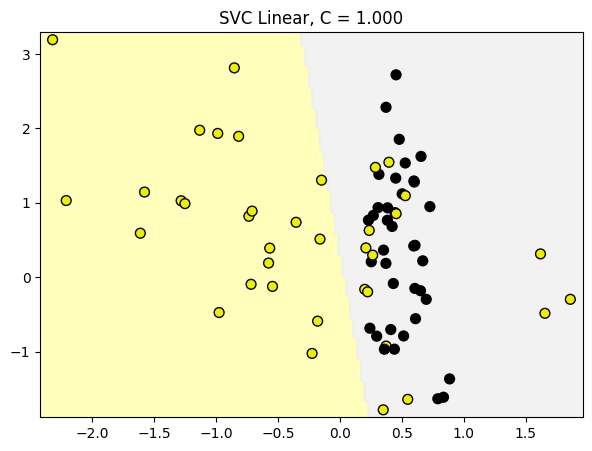

In [24]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)
title = f'SVC Linear, C = {this_C:.3f}'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)


### Máquina de Suporte Vetorial: Parâmetro C

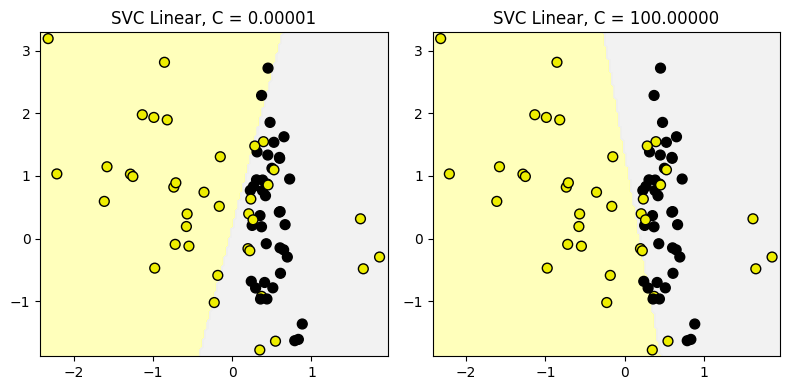

In [25]:
from sklearn.svm import LinearSVC

fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = f'SVC Linear, C = {this_C:.5f}'
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)

plt.tight_layout()

### Aplicação em um conjunto de dados reais

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = LinearSVC().fit(X_train, y_train)

print('Conjunto de câncer de mama')
print(f'Acurácio do classificador linear SVC no conjunto de treinamento: {clf.score(X_train, y_train):.3f}')
print(f'Acurácio do classificador linear SVC no conjunto de teste: {clf.score(X_test, y_test):.3f}')

Conjunto de câncer de mama
Acurácio do classificador linear SVC no conjunto de treinamento: 0.965
Acurácio do classificador linear SVC no conjunto de teste: 0.965


## Classficação Multi-classe com modelos lineares

### LinearSVC com M classes geram M classes (classificador um vs todos)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)

clf = LinearSVC(C=5, random_state=67).fit(X_train ,y_train)

print(f'Coeficientes: \n {clf.coef_}')
print(f'Intercepto: {clf.intercept_}')

Coeficientes: 
 [[-0.28  0.64]
 [-1.64  1.16]
 [-0.01  0.33]
 [ 1.24 -1.73]]
Intercepto: [-2.71  1.21 -2.75  1.68]


### Resultados Multi-classe no conjunto de dados de frutas

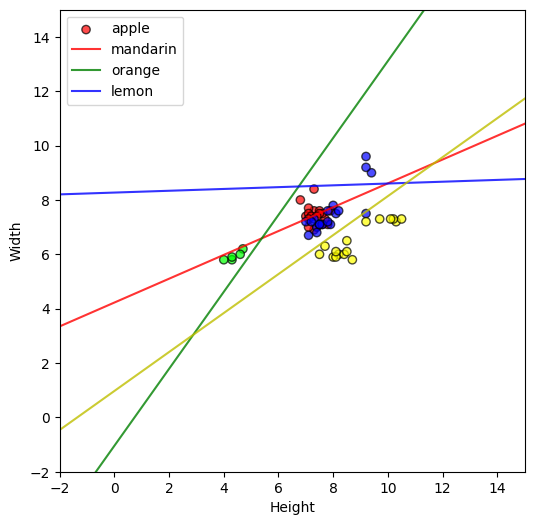

In [28]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(6, 6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']], c=y_fruits_2d, 
            cmap=cmap_fruits, edgecolors='black', alpha=.7)

x_0 = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, colors):
    plt.plot(x_0, -(x_0 * w[0] + b) / w[1], c=color, alpha=.8)

plt.legend(target_names)
plt.xlabel('Height')
plt.ylabel('Width')
plt.xlim(-2, 15)
plt.ylim(-2, 15)
plt.show()
    

## Máquina de Suporte Vetorial (kernelized)

### Classificação

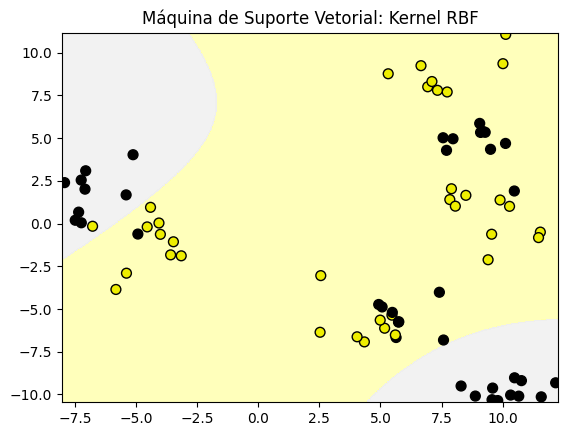

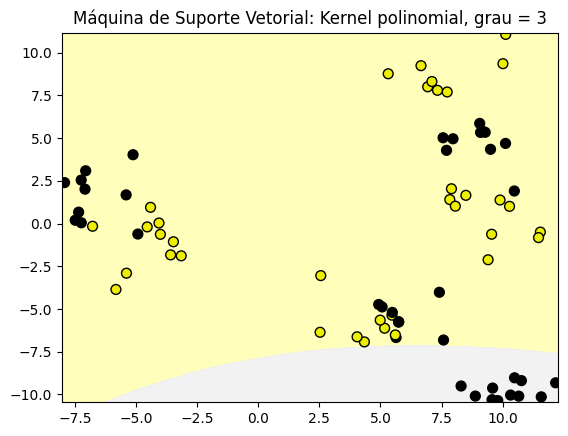

In [29]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8,
                        cluster_std=1.3, random_state=4)

y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

plot_class_regions_for_classifier(SVC().fit(X_train, y_train), X_train, y_train,
                                  None, None, 'Máquina de Suporte Vetorial: Kernel RBF')

plot_class_regions_for_classifier(SVC(kernel='poly', degree=3).fit(X_train, y_train),
                                  X_train, y_train, None, None, 'Máquina de Suporte Vetorial: Kernel polinomial, grau = 3')

### Máquina de Suporte Vetorial com kernel RBF: Parâmetro Gama

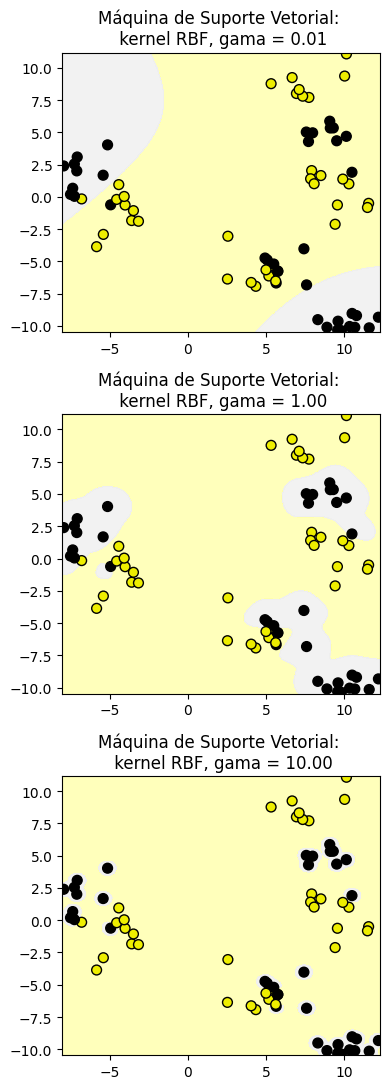

In [30]:
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel='rbf', gamma=this_gamma).fit(X_train, y_train)
    title = f'Máquina de Suporte Vetorial: \n kernel RBF, gama = {this_gamma:.2f}'
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
    
    plt.tight_layout()

### Máquina de Suporte Vetorial com kernel RBF: Usando ambos parâmetros Gama e C

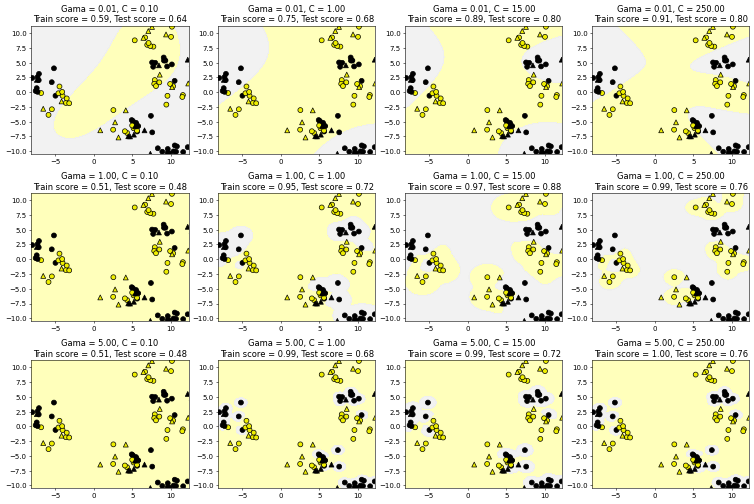

In [31]:
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = f'Gama = {this_gamma:.2f}, C = {this_C:.2f}'
        clf = SVC(kernel='rbf', gamma=this_gamma, C=this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                  X_test, y_test, title, subplot)
        
        plt.tight_layout(pad=.4, w_pad=.5, h_pad=1.0)

### Aplicação de SVMs a um conjunto de dados real: Dados não normalizados

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = SVC(C=10).fit(X_train, y_train)

print('Conjunto de câncer de mama (Características não normalizadas)')
print(f'Acurácio do kernel-RBF da SVC no conjunto de treinamento: {clf.score(X_train, y_train):.3f}')
print(f'Acurácio do kernet-RBF da SVC no conjunto de teste: {clf.score(X_test, y_test):.3f}')

Conjunto de câncer de mama (Características não normalizadas)
Acurácio do kernel-RBF da SVC no conjunto de treinamento: 0.915
Acurácio do kernet-RBF da SVC no conjunto de teste: 0.937


### Aplicação de SVMs a um conjunto de dados real: Dados normalizados com preprocessamento de características

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)

print('Conjunto de câncer de mama (Características normalizadas)')
print(f'Acurácio do kernel-RBF da SVC no conjunto de treinamento: {clf.score(X_train_scaled, y_train):.3f}')
print(f'Acurácio do kerner-RBF da SVC no conjunto de teste: {clf.score(X_test_scaled, y_test):.3f}')

Conjunto de câncer de mama (Características normalizadas)
Acurácio do kernel-RBF da SVC no conjunto de treinamento: 0.988
Acurácio do kerner-RBF da SVC no conjunto de teste: 0.972
